# Observable trends based on the data





A. Correlation from 3 pie charts:
1. We can observe that the "Percentage of Total Drivers"(80.9%) is positively correlated with the "Percentage of Total Rides"(68.4%) and "Percentage of Total Fares"(62.7%); the more total drivers available the more total rides occurring and thus the more amount of total fares received.

2. "Rural" average fares are highest, then "Suburban", last "Urban", which are inversely correlated with the "Percentage of Total Drivers" available (2.6%), (16.5%), (80.9%), respectively.

B. Supply-Demand:using bubble chart
3. We can observe that as the "total number of rides" per city type increases, so does the "average price" per ride increase; "price" then, adjustes at the point where the quantity demanded (number of rides) equal the quantity supplied(total drivers available).

MJV

In [13]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "./city_data.csv"
ride_data_to_load = "./ride_data.csv"

# Read the City and Ride Data
right_city_read = pd.read_csv(city_data_to_load)
left_ride_read = pd.read_csv(ride_data_to_load)

#dtype:int64
#print(city_read.count().head())
#dtype:int64
#print(ride_read.count().head())

In [14]:
# Combine the data into a single dataset
merge_inner = pd.merge(left_ride_read, right_city_read, how='inner', on=['city'])
#merge_inner.count() , 2375rows : all, dtype:int64
#print(merge_inner)

# Display the data table for preview
gr_merged_data = merge_inner.groupby('city', as_index=True)
two = gr_merged_data.head(1)
#two.count()


one = two.reset_index(drop=True)
one.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

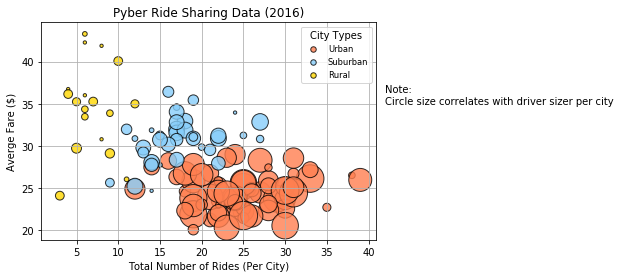

In [15]:
# Obtain the x and y coordinates for each of the three city types

# 1. groupby city 
gr_city = merge_inner.groupby('city')

# 2. get variables
# a. Average Fare ($) Per City
avg_fare = gr_city['fare'].mean()
# b. Total Number of Rides Per City
ride_ct = gr_city['ride_id'].count()
# c. Total Number of Drivers Per City
# the size of the circle
drive_size = right_city_read.set_index('city')['driver_count']
# d. City Type (Urban, Suburban, Rural)
# var use later to set the color for the circle
city_type = right_city_read.set_index('city')['type']

#3. create a data Frame to concatenate them together
grouped_data = pd.DataFrame({"Average Fare":avg_fare,
                             "Total Rides":ride_ct,
                             "Drivers Per City":drive_size,
                             "City Type":city_type}) 

#3. Set the var by City Type using .loc 
#   separate columsn into new df, runs a for loop for grouped_data,
#   checks for =="type", adds to new df saved in variable name "urban", "suburban", "rural"
urban = grouped_data.loc[grouped_data["City Type"] == "Urban"]
suburban = grouped_data.loc[grouped_data["City Type"] == "Suburban"]
rural = grouped_data.loc[grouped_data["City Type"] == "Rural"]

#4. Incorporate the other graph properties
#   plt.scatter(x, y, size, ...formating)
plt.scatter(urban['Total Rides'],urban['Average Fare'],
            s=urban['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='coral', label ="Urban")

plt.scatter(suburban['Total Rides'],suburban['Average Fare'],
            s=suburban['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='lightskyblue', label ="Suburban")

plt.scatter(rural['Total Rides'],rural['Average Fare'],
            s=rural['Drivers Per City']*11, alpha=.8, linewidths=1.0, edgecolors='black',
            color='gold', label ="Rural")

# Create a legend
lgnd = plt.legend(loc="best", title="City Types", fontsize="small", frameon=True, markerscale=0.65)
#lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

#change the marker size manually for both lines
#lgnd.legendHandles[0]._legmarker.set_markersize(6)
#lgnd.legendHandles[1]._legmarker.set_markersize(6)
#lgnd.legendHandles[1]._legmarker.set_markersize(6)

# Incorporate a text label regarding circle size
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Averge Fare ($)")

plt.grid(True, alpha=1, clip_on=True)

#used this to change the size of the markers
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

#add text on side of graph
plt.text(42, 35, 'Note:\nCircle size correlates with driver sizer per city', fontsize=10)

# Save Figure
Pyber = plt.show()

# Show plot
plt.show(Pyber)


#missing: adjust marker size to be the same
#         add comment on size of graph
#         bring forward grids


## Total Fares by City Type

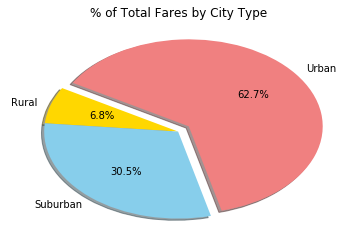

In [16]:
gr_city = merge_inner.groupby('city')
avg_fare = gr_city['fare'].sum()
city_type = right_city_read.set_index('city')['type']
cleaned_data = pd.DataFrame({"Total Fare":avg_fare, "City Type":city_type}) 
sume = cleaned_data.groupby(['City Type']).sum()
sume

# Build Pie Chart
f_explode = (0, 0, .1)
f_labels = ["Rural", "Suburban", "Urban"]
f_colors = ["gold", "skyblue", "lightcoral"]
plt.title("% of Total Fares by City Type")

# Save Figure
pie_totfares = plt.pie(sume, explode=f_explode, labels=f_labels, colors=f_colors, autopct='%1.1f%%', shadow=True, startangle=150)

# Show
plt.show(pie_totfares)

## Total Rides by City Type

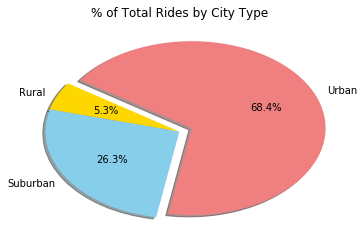

In [17]:
# Calculate Ride Percents
# Urban == 68.4% -1625
tolr_urban = urban["Total Rides"].sum()
tolr_suburban = suburban["Total Rides"].sum()
tolr_rural = rural["Total Rides"].sum()

# Build Pie Chart
labels = ["Urban","Rural","Suburban"]
sizes = [tolr_urban,tolr_rural, tolr_suburban,]
explode = (0.1, 0, 0)
colors = ["lightcoral", "gold", "skyblue"]
plt.title("% of Total Rides by City Type")

# Save Figure
pie_totrides = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=260)

# Show
plt.show(pie_totrides)


## Total Drivers by City Type

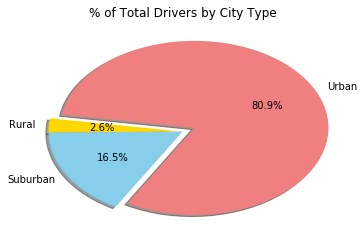

In [18]:
# Calculate Driver Percents
# Urban ==80.9%
told_urban = urban["Drivers Per City"].sum()
told_suburban = suburban["Drivers Per City"].sum()
told_rural = rural["Drivers Per City"].sum()

# Build Pie Chart
d_labels = ["Urban","Rural","Suburban"]
d_sizes = [told_urban,told_rural, told_suburban,]
d_explode = (0.1, 0, 0)
d_colors = ["lightcoral", "gold", "skyblue"]
plt.title("% of Total Drivers by City Type")

# Save Figure
pie_totdrivers = plt.pie(d_sizes, explode=d_explode, labels=d_labels, colors=d_colors, autopct='%1.1f%%', shadow=True, startangle=240)

# Show
plt.show(pie_totdrivers)